## Importing Libraries

In [26]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Setting the style for seaborn
sns.set(style="ticks")

# Matplotlib inline for Jupyter notebooks
%matplotlib inline

## Data Loading

In [2]:
# Load the datasets
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv', parse_dates=['Date'], index_col='Date', low_memory=False)
test_df = pd.read_csv('test.csv', parse_dates=['Date'], index_col='Date', low_memory=False)

# Display the first few rows of each dataset to verify loading
print("Store DataFrame:")
print(store_df.head(), "\n")# Check for missing values in the test dataset
print("Missing Values in Test DataFrame:")
print(test_df.isnull().sum(), "\n")

# Inspect unique values in the 'Open' column to decide on filling strategy
unique_open_values = test_df['Open'].unique()
print("Unique values in 'Open' column:", unique_open_values)

# Count the frequency of each unique value in the 'Open' column
open_value_counts = test_df['Open'].value_counts(dropna=False)
print("\nFrequency of unique values in 'Open' column:")
print(open_value_counts)


print("Train DataFrame:")
print(train_df.head(), "\n")

print("Test DataFrame:")
print(test_df.head(), "\n")

Store DataFrame:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,

In [3]:
# Inspect the train dataset for mixed data types and general info
print("Train DataFrame Info:")
print(train_df.info(), "\n")

# Inspect unique values in the 'StateHoliday' column
unique_state_holiday_values = train_df['StateHoliday'].unique()
print("Unique values in 'StateHoliday' column before cleaning:", unique_state_holiday_values, "\n")

# Check for missing values in the train dataset
print("Missing Values in Train DataFrame:")
print(train_df.isnull().sum(), "\n")

# Inspect the store dataset for mixed data types and general info
print("Store DataFrame Info:")
print(store_df.info(), "\n")

# Check for missing values in the store dataset
print("Missing Values in Store DataFrame:")
print(store_df.isnull().sum(), "\n")

# Inspect the test dataset for mixed data types and general info
print("Test DataFrame Info:")
print(test_df.info(), "\n")

# Check for missing values in the test dataset# Check for missing values in the test dataset
print("Missing Values in Test DataFrame:")
print(test_df.isnull().sum(), "\n")

# Inspect unique values in the 'Open' column to decide on filling strategy
unique_open_values = test_df['Open'].unique()
print("Unique values in 'Open' column:", unique_open_values)

# Count the frequency of each unique value in the 'Open' column
open_value_counts = test_df['Open'].value_counts(dropna=False)
print("\nFrequency of unique values in 'Open' column:")
print(open_value_counts)

print("Missing Values in Test DataFrame:")
print(test_df.isnull().sum(), "\n")

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB
None 

Unique values in 'StateHoliday' column before cleaning: ['0' 'a' 'b' 'c'] 

Missing Values in Train DataFrame:
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

Store DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Range

In [4]:
# Convert 'StateHoliday' to string type and clean any unusual values
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

# Define a mapping to clean and standardize the values
state_holiday_mapping = {
    '0': 'None',
    'a': 'Public Holiday',
    'b': 'Easter Holiday',
    'c': 'Christmas',
    # Add any other mappings if necessary
}

# Apply the mapping
train_df['StateHoliday'] = train_df['StateHoliday'].map(state_holiday_mapping).fillna('None')

# Verify the changes# Check for missing values in the test dataset
print("Missing Values in Test DataFrame:")
print(test_df.isnull().sum(), "\n")

# Inspect unique values in the 'Open' column to decide on filling strategy
unique_open_values = test_df['Open'].unique()
print("Unique values in 'Open' column:", unique_open_values)

# Count the frequency of each unique value in the 'Open' column
open_value_counts = test_df['Open'].value_counts(dropna=False)
print("\nFrequency of unique values in 'Open' column:")
print(open_value_counts)

unique_state_holiday_values_after = train_df['StateHoliday'].unique()
print("Unique values in 'StateHoliday' column after cleaning:", unique_state_holiday_values_after)


Missing Values in Test DataFrame:
Id                0
Store             0
DayOfWeek         0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64 

Unique values in 'Open' column: [ 1. nan  0.]

Frequency of unique values in 'Open' column:
Open
1.0    35093
0.0     5984
NaN       11
Name: count, dtype: int64
Unique values in 'StateHoliday' column after cleaning: ['None' 'Public Holiday' 'Easter Holiday' 'Christmas']


In [5]:
# Handle missing values in the store dataset
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna('None', inplace=True)

# Verify the changes
print("Missing Values in Store DataFrame after handling:")
print(store_df.isnull().sum(), "\n")


Missing Values in Store DataFrame after handling:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64 



Number of entries with closed stores and zero sales: 172817
Proportion of closed stores in the dataset: 0.16989330609540418
Number of entries with open stores but zero sales: 54
Proportion of open stores with zero sales in the dataset: 5.3086435530947915e-05


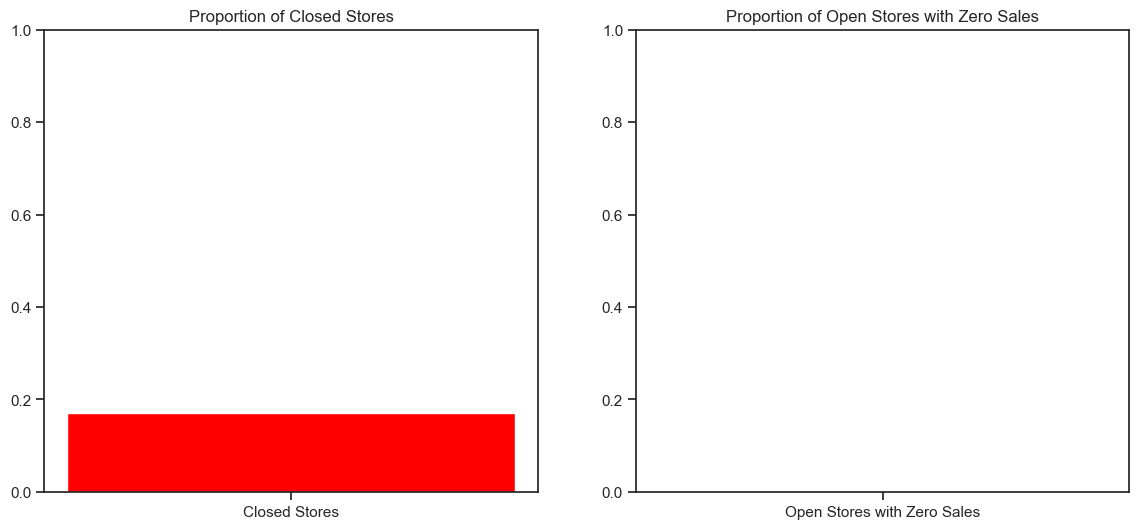

In [6]:
# Analyze entries where stores are closed and have zero sales
closed_stores = train_df[(train_df['Open'] == 0) & (train_df['Sales'] == 0)]
print("Number of entries with closed stores and zero sales:", len(closed_stores))

# Proportion of closed stores in the dataset
closed_store_proportion = len(closed_stores) / len(train_df)
print("Proportion of closed stores in the dataset:", closed_store_proportion)

# Analyze entries where stores are open but have zero sales
open_zero_sales = train_df[(train_df['Open'] != 0) & (train_df['Sales'] == 0)]
print("Number of entries with open stores but zero sales:", len(open_zero_sales))

# Proportion of open stores with zero sales in the dataset
open_zero_sales_proportion = len(open_zero_sales) / len(train_df)
print("Proportion of open stores with zero sales in the dataset:", open_zero_sales_proportion)

# Visualize the distribution of these entries
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of closed stores
ax[0].bar(['Closed Stores'], [closed_store_proportion], color='red')
ax[0].set_title('Proportion of Closed Stores')
ax[0].set_ylim(0, 1)

# Distribution of open stores with zero sales
ax[1].bar(['Open Stores with Zero Sales'], [open_zero_sales_proportion], color='blue')
ax[1].set_title('Proportion of Open Stores with Zero Sales')
ax[1].set_ylim(0, 1)

plt.show()

In [7]:
# Dropping rows where stores are closed or have zero sales
print("Initial shape of train DataFrame:", train_df.shape)

# Dropping rows where stores are closed or have zero sales
train_df = train_df[(train_df["Open"] != 0) & (train_df['Sales'] != 0)]
print("Shape of train DataFrame after dropping closed stores and zero sales entries:", train_df.shape)

# Verify the remaining entries for open stores with zero sales
open_zero_sales_remaining = train_df[(train_df['Open'] != 0) & (train_df['Sales'] == 0)]
print("Remaining entries with open stores but zero sales:", len(open_zero_sales_remaining))


Initial shape of train DataFrame: (1017209, 8)
Shape of train DataFrame after dropping closed stores and zero sales entries: (844338, 8)
Remaining entries with open stores but zero sales: 0


In [8]:
# Load the test data
test_df = pd.read_csv('test.csv')

# Display the structure and columns of the test data
print(test_df.info())
print(test_df.head())
print(test_df.columns)

# Ensure 'Date' column exists and is in the correct format
if 'Date' in test_df.columns:
    test_df['Date'] = pd.to_datetime(test_df['Date'])
else:
    raise KeyError("The 'Date' column is not present in the DataFrame.")

# Identify dates with missing 'Open' values for Store 622
nan_open_rows = test_df[(test_df['Store'] == 622) & (test_df['Open'].isna())]
dates_with_missing_open = nan_open_rows['Date'].unique()
print("Dates with missing 'Open' values for Store 622:", dates_with_missing_open)

# Define a threshold for deciding (e.g., if more than 50% stores are open, assume open)
threshold = 0.5

# Determine the fill value for each date
fill_values = {}
for date in dates_with_missing_open:
    open_count = test_df[(test_df['Date'] == date) & (test_df['Open'] == 1)].shape[0]
    total_count = test_df[test_df['Date'] == date].shape[0]
    proportion_open = open_count / total_count if total_count > 0 else 0
    fill_values[date] = 1 if proportion_open > threshold else 0

print("Fill values for missing 'Open' entries:", fill_values)

# Apply the fill value to the missing 'Open' values for Store 622
for date in dates_with_missing_open:
    test_df.loc[(test_df['Store'] == 622) & (test_df['Date'] == date) & (test_df['Open'].isna()), 'Open'] = fill_values[date]

# Verify the changes
nan_open_rows_after = test_df[test_df['Open'].isna()]
print("Rows with NaN 'Open' values after filling:")
print(nan_open_rows_after)

# Save the updated test dataframe to verify the changes
test_df.to_csv('test_with_filled_open.csv', index=False)
print("Updated test dataframe with filled 'Open' values has been saved to 'test_with_filled_open.csv'.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0


In [9]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df.set_index('Date', inplace=True)

# Extract date components from the training data
train_df['Year'] = train_df.index.year
train_df['Month'] = train_df.index.month
train_df['Day'] = train_df.index.day
train_df['DayOfWeek'] = train_df.index.dayofweek
train_df['WeekOfYear'] = train_df.index.isocalendar().week

# Extract date components from the test data
test_df['Year'] = test_df.index.year
test_df['Month'] = test_df.index.month
test_df['Day'] = test_df.index.day
test_df['DayOfWeek'] = test_df.index.dayofweek
test_df['WeekOfYear'] = test_df.index.isocalendar().week

# Verify the changes
print("Train DataFrame with new date components:")
print(train_df.head())

print("\nTest DataFrame with new date components:")
print(test_df.head())

Train DataFrame with new date components:
            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          4   5263        555     1      1         None   
2015-07-31      2          4   6064        625     1      1         None   
2015-07-31      3          4   8314        821     1      1         None   
2015-07-31      4          4  13995       1498     1      1         None   
2015-07-31      5          4   4822        559     1      1         None   

            SchoolHoliday  Year  Month  Day  WeekOfYear  
Date                                                     
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  

Test DataFrame wit

In [10]:
# Create Sales per Customer feature in the training data
train_df['SalesPerCustomer'] = train_df['Sales'] / train_df['Customers']

# Verify the changes
print("\nTrain DataFrame with SalesPerCustomer feature:")
print(train_df.head())


Train DataFrame with SalesPerCustomer feature:
            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          4   5263        555     1      1         None   
2015-07-31      2          4   6064        625     1      1         None   
2015-07-31      3          4   8314        821     1      1         None   
2015-07-31      4          4  13995       1498     1      1         None   
2015-07-31      5          4   4822        559     1      1         None   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalesPerCustomer  
Date                                                                       
2015-07-31              1  2015      7   31          31          9.482883  
2015-07-31              1  2015      7   31          31          9.702400  
2015-07-31              1  2015      7   31          31         10.126675  
2015-07-31              1  2015      7 

In [11]:
# Merge store_df into train_df to include store-related features
train_df = train_df.reset_index().merge(store_df, on='Store', how='left').set_index('Date')

# Verify the merged DataFrame
print("\nMerged Train DataFrame:")
print(train_df.head())


Merged Train DataFrame:
            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          4   5263        555     1      1         None   
2015-07-31      2          4   6064        625     1      1         None   
2015-07-31      3          4   8314        821     1      1         None   
2015-07-31      4          4  13995       1498     1      1         None   
2015-07-31      5          4   4822        559     1      1         None   

            SchoolHoliday  Year  Month  ...  SalesPerCustomer  StoreType  \
Date                                    ...                                
2015-07-31              1  2015      7  ...          9.482883          c   
2015-07-31              1  2015      7  ...          9.702400          a   
2015-07-31              1  2015      7  ...         10.126675          a   
2015-07-31              1  2015      7  ...          9.342457 

In [12]:
# Create binary features for Promo2 active status in the training data
train_df['Promo2Active'] = train_df.apply(lambda row: 1 if row['Promo2'] == 1 and not pd.isnull(row['PromoInterval']) else 0, axis=1)

In [13]:
# Create binary features for each type of holiday in the training data
train_df['PublicHoliday'] = train_df['StateHoliday'].apply(lambda x: 1 if x == 'a' else 0)
train_df['EasterHoliday'] = train_df['StateHoliday'].apply(lambda x: 1 if x == 'b' else 0)
train_df['Christmas'] = train_df['StateHoliday'].apply(lambda x: 1 if x == 'c' else 0)

In [14]:
# Create feature for the number of months since competition opened in the training data
train_df['CompetitionOpenSince'] = (train_df['Year'] - train_df['CompetitionOpenSinceYear']) * 12 + (train_df['Month'] - train_df['CompetitionOpenSinceMonth'])
train_df['CompetitionOpenSince'] = train_df['CompetitionOpenSince'].apply(lambda x: max(0, x))  # Ensure non-negative values

In [15]:
# Create lag features for sales in the training data
for lag in [1, 7, 14]:
    train_df[f'SalesLag_{lag}'] = train_df['Sales'].shift(lag)

In [16]:
# Verify the changes in the training data
print("\nTrain DataFrame with additional features:")
print(train_df.head())


Train DataFrame with additional features:
            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          4   5263        555     1      1         None   
2015-07-31      2          4   6064        625     1      1         None   
2015-07-31      3          4   8314        821     1      1         None   
2015-07-31      4          4  13995       1498     1      1         None   
2015-07-31      5          4   4822        559     1      1         None   

            SchoolHoliday  Year  Month  ...  Promo2SinceYear    PromoInterval  \
Date                                    ...                                     
2015-07-31              1  2015      7  ...              0.0             None   
2015-07-31              1  2015      7  ...           2010.0  Jan,Apr,Jul,Oct   
2015-07-31              1  2015      7  ...           2011.0  Jan,Apr,Jul,Oct   
2015-07-31         

## Exploratory Data Analysis

In [17]:
# Descriptive statistics for the training data
print("Descriptive Statistics for the Training Data:")
print(train_df.describe())

Descriptive Statistics for the Training Data:
               Store      DayOfWeek          Sales      Customers      Open  \
count  844338.000000  844338.000000  844338.000000  844338.000000  844338.0   
mean      558.421374       2.520350    6955.959134     762.777166       1.0   
std       321.730861       1.723712    3103.815515     401.194153       0.0   
min         1.000000       0.000000      46.000000       8.000000       1.0   
25%       280.000000       1.000000    4859.000000     519.000000       1.0   
50%       558.000000       2.000000    6369.000000     676.000000       1.0   
75%       837.000000       4.000000    8360.000000     893.000000       1.0   
max      1115.000000       6.000000   41551.000000    7388.000000       1.0   

               Promo  SchoolHoliday           Year          Month  \
count  844338.000000  844338.000000  844338.000000  844338.000000   
mean        0.446356       0.193578    2013.831945       5.845774   
std         0.497114       0.395102

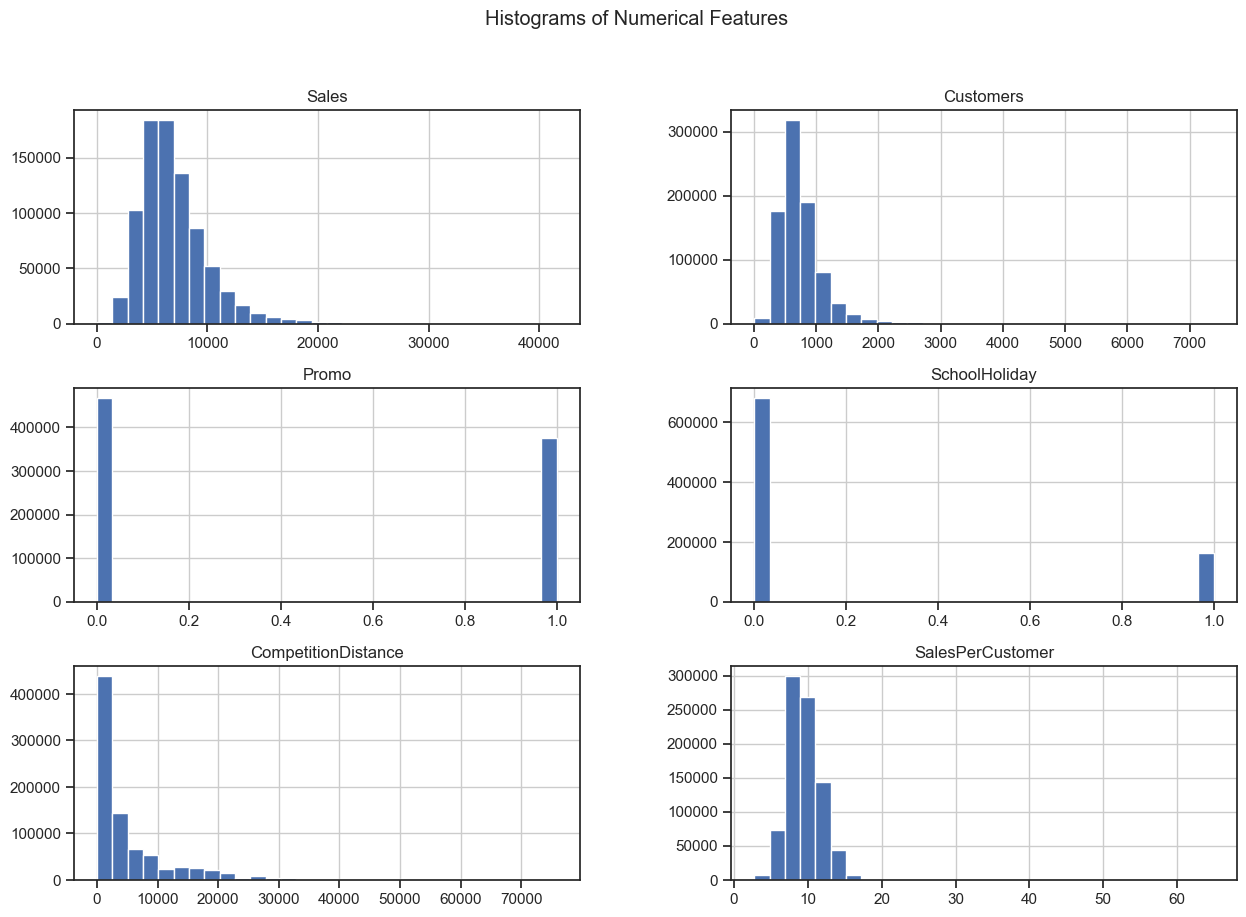

In [18]:
numerical_features = ['Sales', 'Customers', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'SalesPerCustomer']

train_df[numerical_features].hist(bins=30, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Features')
plt.show()

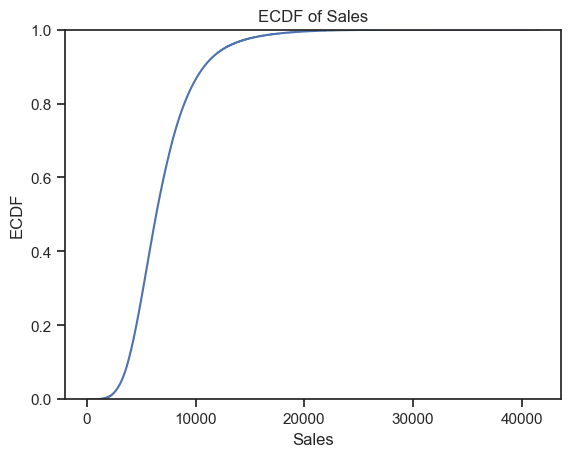

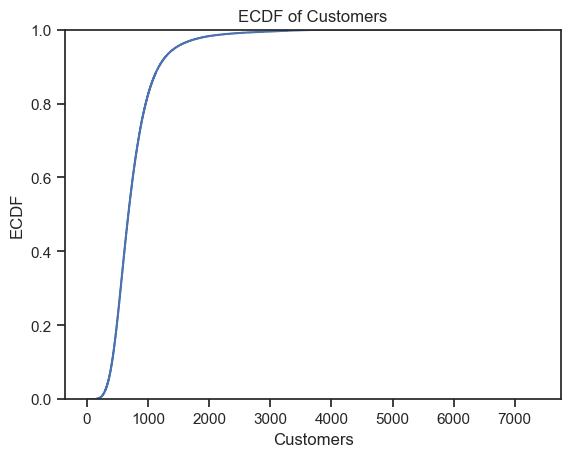

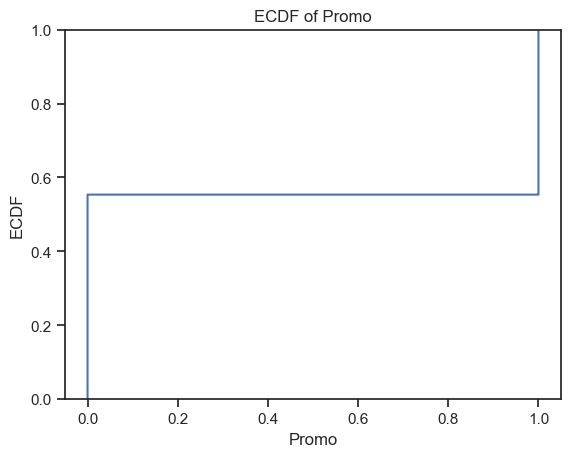

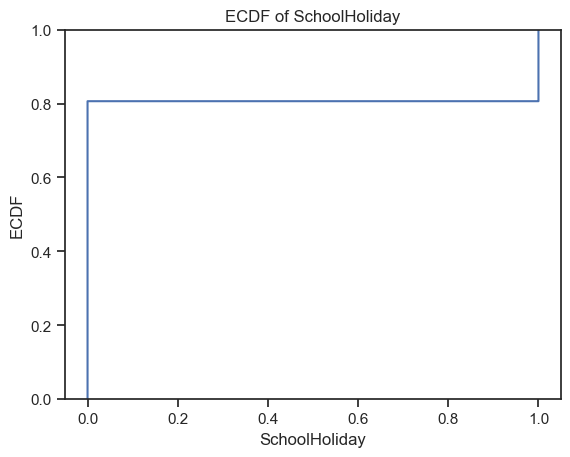

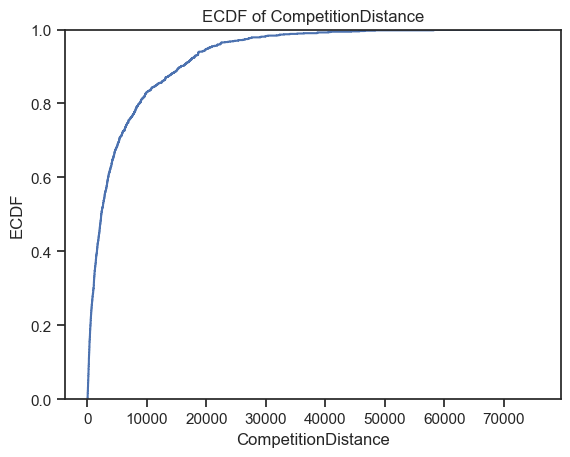

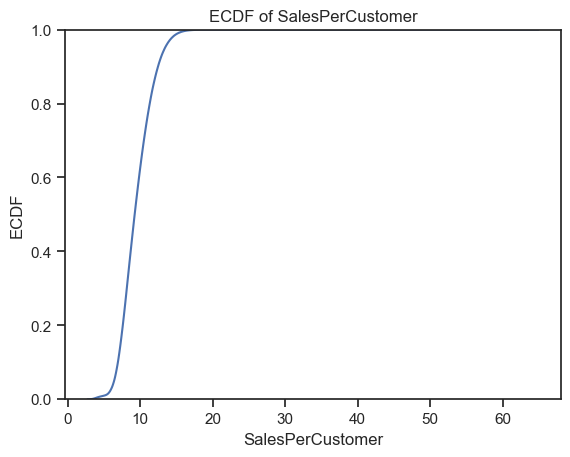

In [19]:
def plot_ecdf(data, feature, title):
    sns.ecdfplot(data[feature])
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('ECDF')
    plt.show()

# Plot ECDF for numerical features
for feature in numerical_features:
    plot_ecdf(train_df, feature, f'ECDF of {feature}')

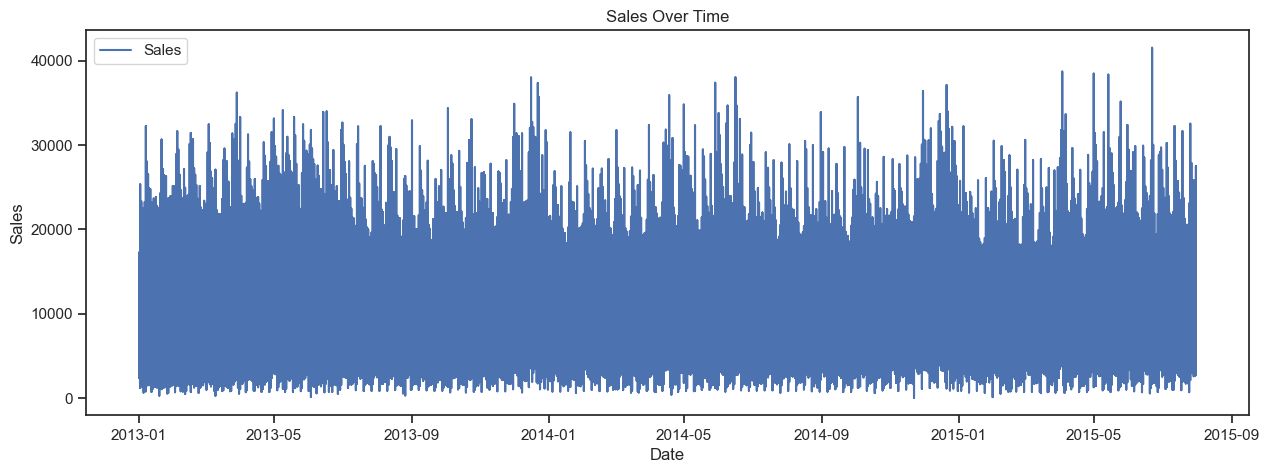

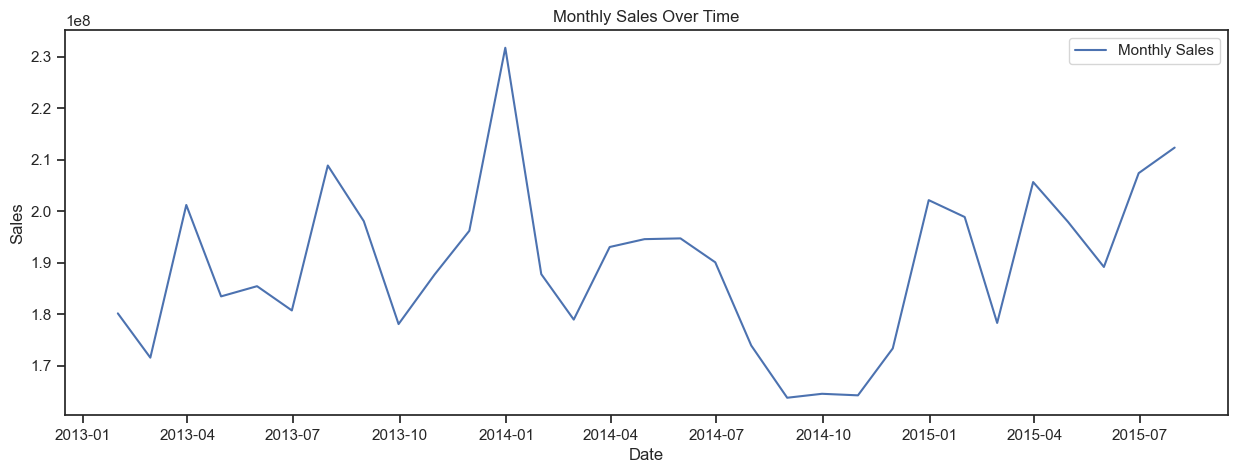

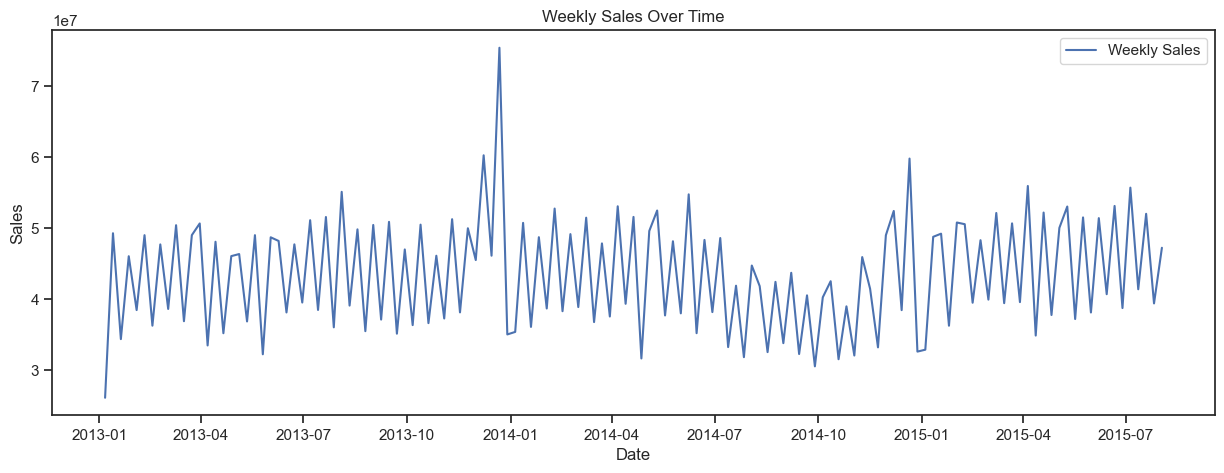

In [20]:
# Plot time series data to identify trends and seasonality
plt.figure(figsize=(15, 5))
plt.plot(train_df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot monthly sales
monthly_sales = train_df['Sales'].resample('M').sum()
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot weekly sales
weekly_sales = train_df['Sales'].resample('W').sum()
plt.figure(figsize=(15, 5))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

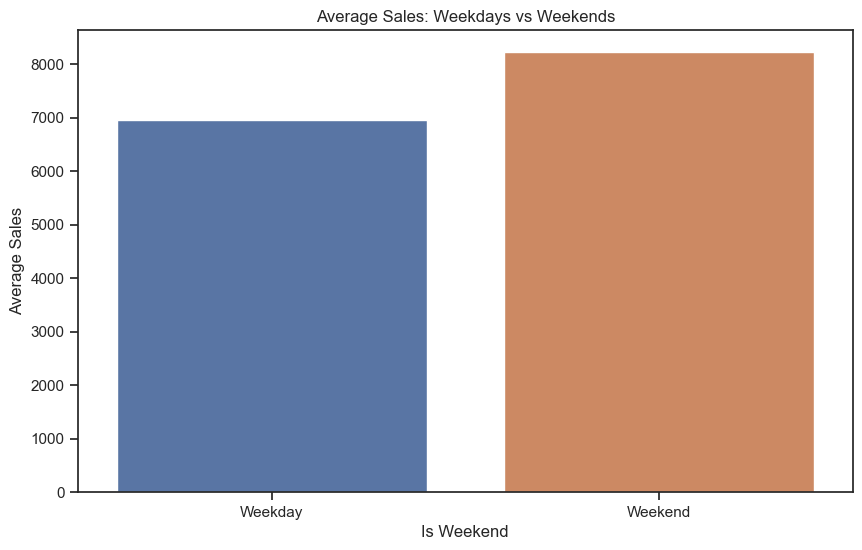

In [21]:
train_df['IsWeekend'] = train_df['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)

# Plot the average sales on weekdays vs weekends
plt.figure(figsize=(10, 6))
sns.barplot(x='IsWeekend', y='Sales', data=train_df, estimator=np.mean, errorbar=None)
plt.title('Average Sales: Weekdays vs Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

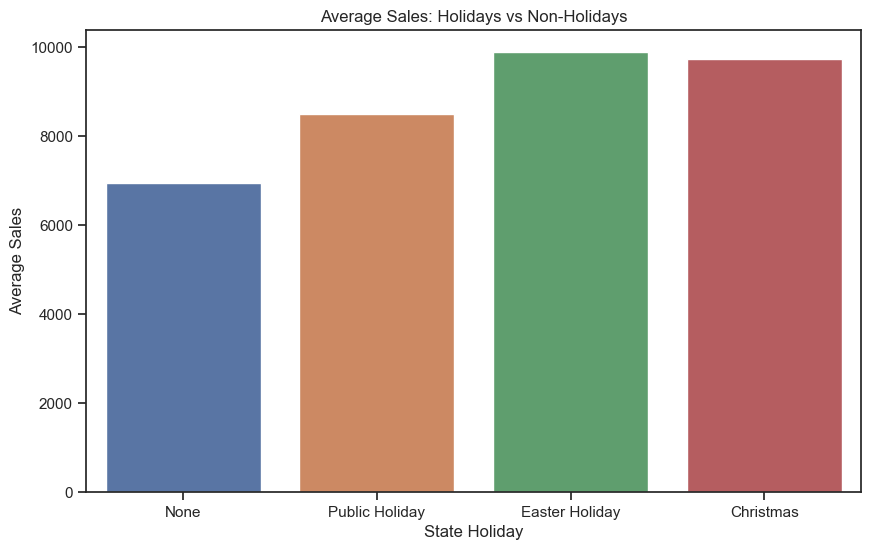

In [22]:
# Plot the average sales on holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=train_df, estimator=np.mean, errorbar=None)
plt.title('Average Sales: Holidays vs Non-Holidays')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.show()


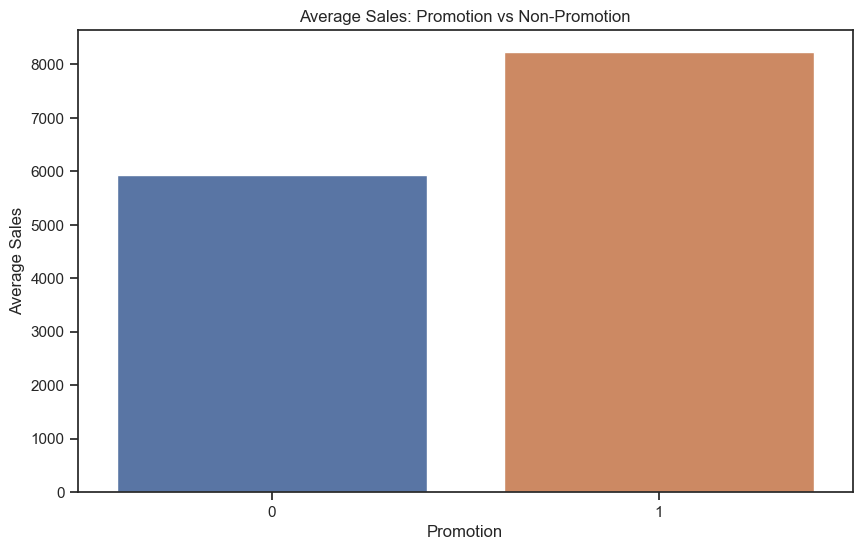

In [23]:
# Plot the average sales on promotion vs non-promotion
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=train_df, estimator=np.mean, errorbar=None)
plt.title('Average Sales: Promotion vs Non-Promotion')
plt.xlabel('Promotion')
plt.ylabel('Average Sales')
plt.show()


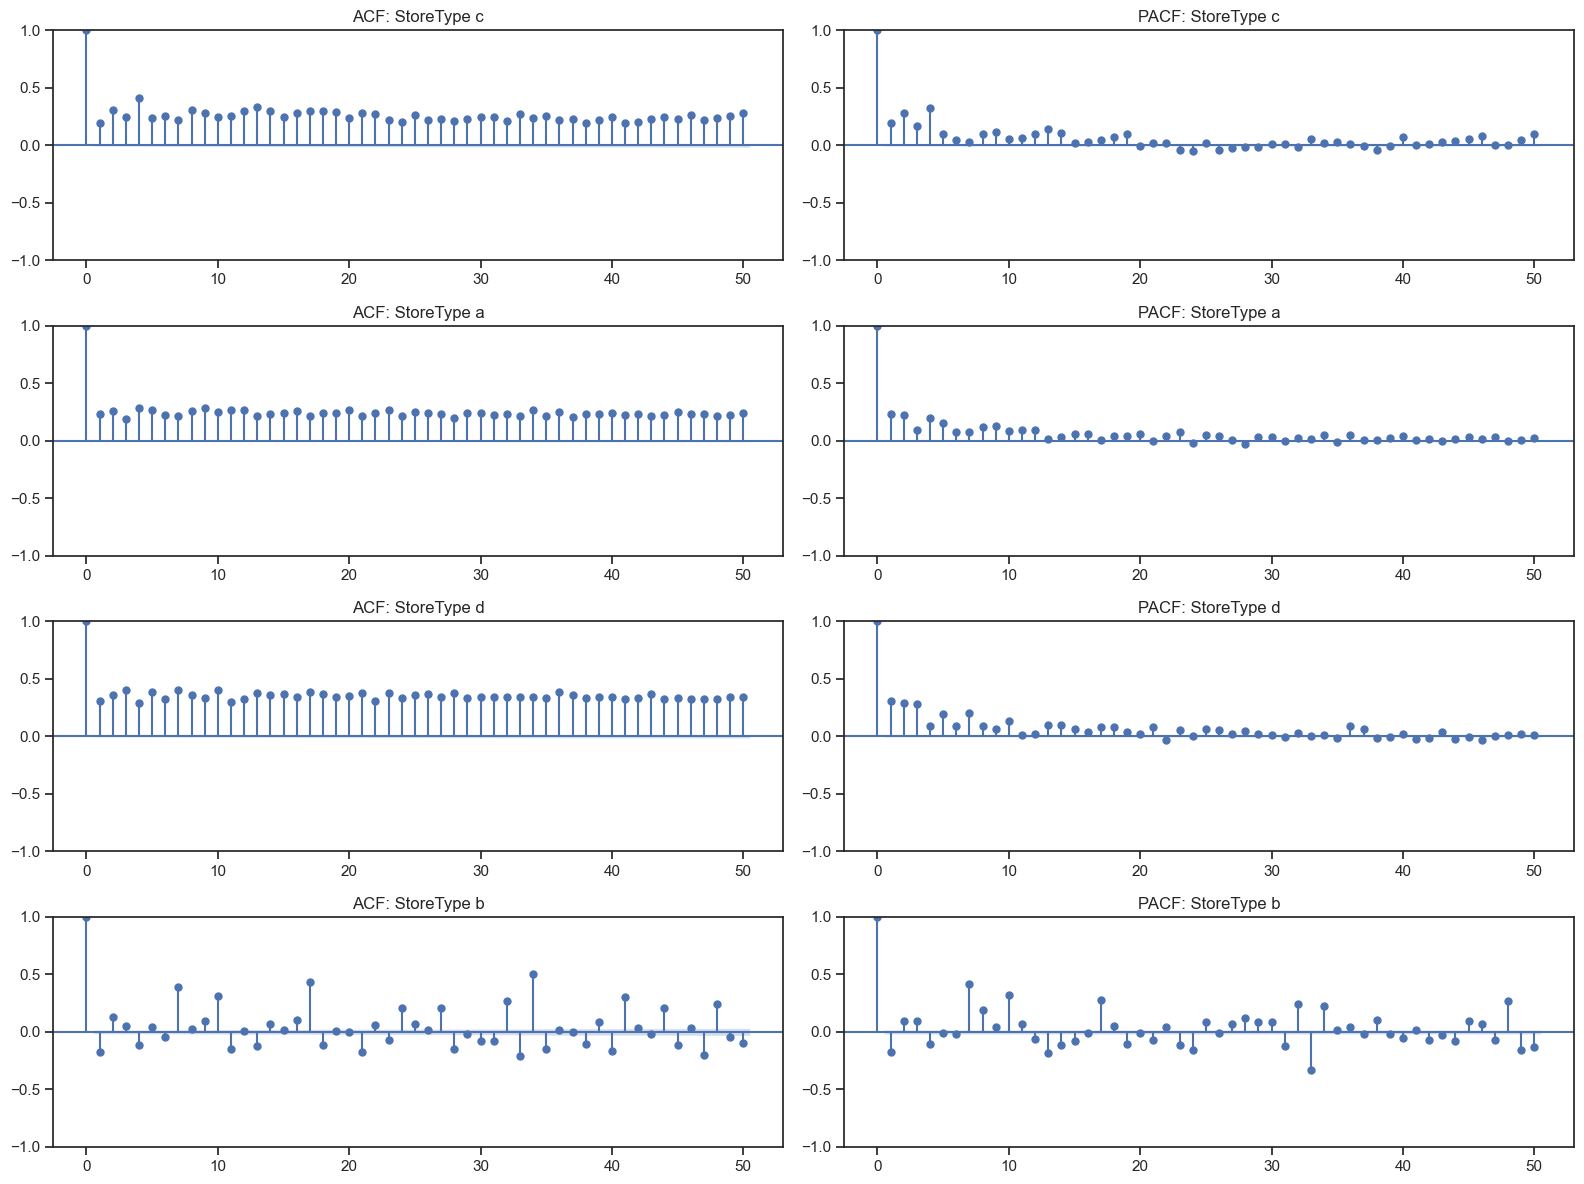

In [24]:
store_types = train_df['StoreType'].unique()

# Create a figure for subplots
plt.figure(figsize=(16, 12))

# Plot ACF and PACF for each store type
for i, store_type in enumerate(store_types):
    store_sales = train_df[train_df['StoreType'] == store_type]['Sales']

    # Plot ACF
    plt.subplot(len(store_types), 2, 2 * i + 1)
    sm.graphics.tsa.plot_acf(store_sales, lags=50, ax=plt.gca())
    plt.title(f'ACF: StoreType {store_type}')

    # Plot PACF
    plt.subplot(len(store_types), 2, 2 * i + 2)
    sm.graphics.tsa.plot_pacf(store_sales, lags=50, ax=plt.gca())
    plt.title(f'PACF: StoreType {store_type}')

plt.tight_layout()
plt.show()

## Prophet Model

Training Data Shape: (675470, 31)
Validation Data Shape: (168868, 31)
Prophet Training DataFrame:
          ds      y  promo
0 2015-07-31   5263      1
1 2015-07-31   6064      1
2 2015-07-31   8314      1
3 2015-07-31  13995      1
4 2015-07-31   4822      1
Prophet Validation DataFrame:
          ds      y  promo
0 2013-07-04   4513      1
1 2013-07-04   5749      1
2 2013-07-04  10201      1
3 2013-07-04  15589      1
4 2013-07-04   7227      1
Holidays DataFrame:
         holiday         ds
0  state_holiday 2015-06-04
1  state_holiday 2015-06-04
2  state_holiday 2015-06-04
3  state_holiday 2015-06-04
4  state_holiday 2015-06-04


23:37:40 - cmdstanpy - INFO - Chain [1] start processing
23:40:46 - cmdstanpy - INFO - Chain [1] done processing


Future Dates DataFrame:
            ds  promo
878 2015-09-07    0.0
879 2015-09-08    0.0
880 2015-09-09    0.0
881 2015-09-10    0.0
882 2015-09-11    0.0
Prophet Forecast:
            ds         yhat   yhat_lower    yhat_upper
878 2015-09-07  6071.452112   613.722446  11540.958967
879 2015-09-08  4931.511967  -771.215406  10762.061894
880 2015-09-09  4568.622813  -745.715142   9986.308513
881 2015-09-10  4538.604975 -1286.510598  10322.967331
882 2015-09-11  4893.666430  -548.153195  10742.799496


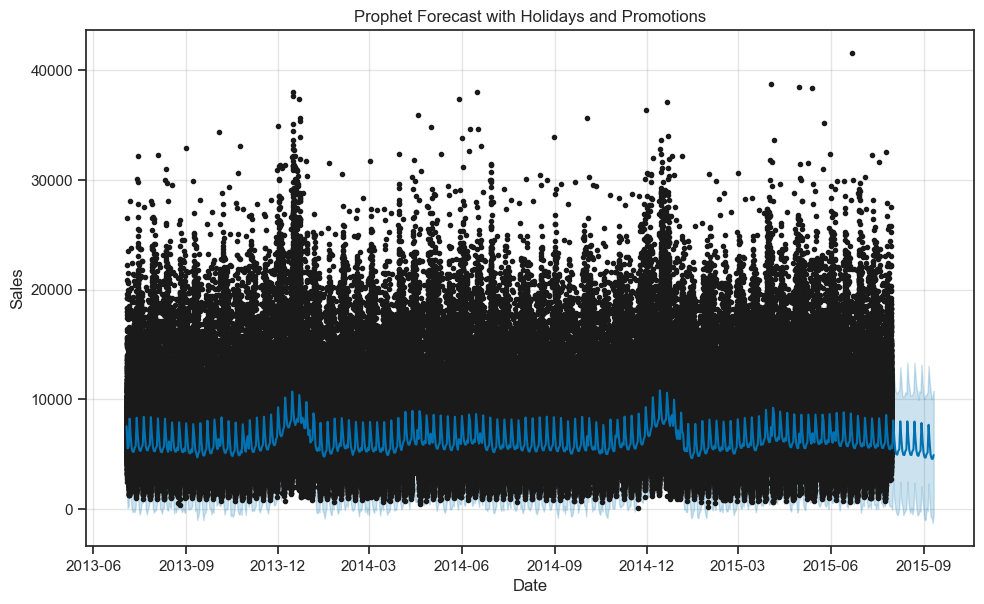

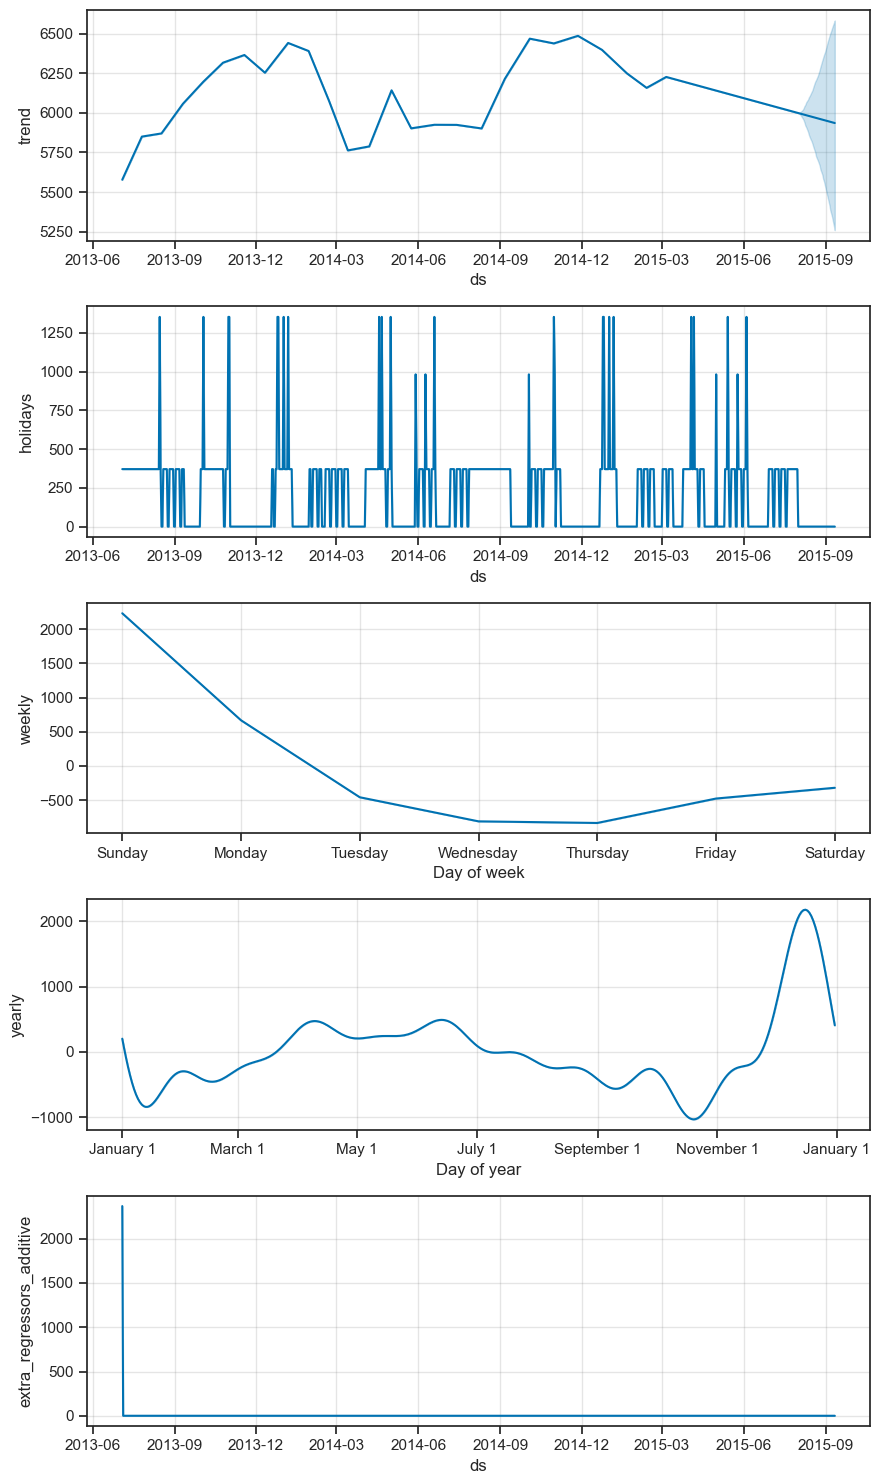

Validation Results:
          ds     y         yhat
0 2013-07-04  4513  7520.963175
1 2013-07-04  4513  7520.963175
2 2013-07-04  4513  7520.963175
3 2013-07-04  4513  7520.963175
4 2013-07-04  4513  7520.963175
Mean Absolute Error (MAE): 2054.887596390357
Mean Squared Error (MSE): 7996746.988088424
Mean Absolute Percentage Error (MAPE): 29.117911701187882%
Accuracy: 70.88208829881212%


In [27]:
# Step 1: Split the data into training and validation sets
train_data, validation_data = train_test_split(train_df, test_size=0.2, shuffle=False)

# Verify the split
print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", validation_data.shape)

# Step 2: Prepare the data for Prophet
prophet_train_df = train_data.reset_index()[['Date', 'Sales', 'Promo']]
prophet_train_df.columns = ['ds', 'y', 'promo']

prophet_validation_df = validation_data.reset_index()[['Date', 'Sales', 'Promo']]
prophet_validation_df.columns = ['ds', 'y', 'promo']

# Verify the data
print("Prophet Training DataFrame:")
print(prophet_train_df.head())

print("Prophet Validation DataFrame:")
print(prophet_validation_df.head())

# Step 3: Create Holiday DataFrames
state_dates = train_df[train_df['StateHoliday'].isin(['Public Holiday', 'Easter Holiday', 'Christmas'])].index
school_dates = train_df[train_df['SchoolHoliday'] == 1].index

state = pd.DataFrame({'holiday': 'state_holiday', 'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday', 'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school)).reset_index(drop=True)

# Verify the holidays DataFrame
print("Holidays DataFrame:")
print(holidays.head())

# Step 4: Initialize and Fit the Prophet Model
prophet_model = Prophet(interval_width=0.95, holidays=holidays)
prophet_model.add_regressor('promo')
prophet_model.fit(prophet_train_df)

# Step 5: Create Future DataFrame
future_dates = prophet_model.make_future_dataframe(periods=6*7)
future_dates = future_dates.merge(prophet_validation_df[['ds', 'promo']], on='ds', how='left')
future_dates['promo'].fillna(0, inplace=True)

# Verify the future_dates DataFrame
print("Future Dates DataFrame:")
print(future_dates.tail())

# Step 6: Predict Future Sales
forecast = prophet_model.predict(future_dates)

# Verify the forecast
print("Prophet Forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Step 7: Plot the Forecast
fig = prophet_model.plot(forecast)
plt.title("Prophet Forecast with Holidays and Promotions")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Step 8: Plot the Holiday Effects
fig = prophet_model.plot_components(forecast)
plt.show()

# Step 9: Evaluate the Model Performance
# Filter the forecast to only include the validation period
validation_forecast = forecast[forecast['ds'].isin(prophet_validation_df['ds'])]

# Merge actual sales with the forecasted sales
validation_results = prophet_validation_df[['ds', 'y']].copy()
validation_results = validation_results.merge(validation_forecast[['ds', 'yhat']], on='ds')

# Verify the validation results
print("Validation Results:")
print(validation_results.head())

# Calculate MAE
mae = mean_absolute_error(validation_results['y'], validation_results['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(validation_results['y'], validation_results['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate MAPE
p_mape = np.mean(np.abs((validation_results['y'] - validation_results['yhat']) / validation_results['y'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {p_mape}%')

accuracy = 100 - p_mape
print(f'Accuracy: {accuracy}%')

## SARIMA MOdel

In [28]:
# Step 1: Prepare sarima_train_df for SARIMA
sarima_train_df = train_df.groupby('Date').agg({
    'Sales': 'sum',
    'Promo': 'max'
}).reset_index()

# Split the aggregated data into training and validation sets
sarima_train_data, sarima_validation_data = train_test_split(sarima_train_df, test_size=0.2, shuffle=False)

# Verify the split
print("SARIMA Training Data Shape:", sarima_train_data.shape)
print("SARIMA Validation Data Shape:", sarima_validation_data.shape)

# Set the frequency of the date index to daily
sarima_train_data.set_index('Date', inplace=True)
sarima_train_data.index = pd.DatetimeIndex(sarima_train_data.index).to_period('D')

# Define the grid search parameters for SARIMA with a reduced search space
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

# Perform grid search to find the best parameters
best_aic = np.inf
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sarima_train_data['Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            exog=sarima_train_data[['Promo']],
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
            
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue

print('Best SARIMA{}x{} - AIC:{}'.format(best_params[0], best_params[1], best_aic))

# Train the SARIMA model with the best parameters
best_pdq = best_params[0]
best_seasonal_pdq = best_params[1]

sarima_model = sm.tsa.statespace.SARIMAX(sarima_train_data['Sales'],
                                         order=best_pdq,
                                         seasonal_order=best_seasonal_pdq,
                                         exog=sarima_train_data[['Promo']])
sarima_fit = sarima_model.fit(disp=False)

# Print the model summary
print(sarima_fit.summary())

# Prepare validation data for SARIMA
sarima_validation_data.set_index('Date', inplace=True)
sarima_validation_data.index = pd.DatetimeIndex(sarima_validation_data.index).to_period('D')

# Forecast future values
forecast = sarima_fit.predict(start=sarima_validation_data.index[0], end=sarima_validation_data.index[-1], exog=sarima_validation_data[['Promo']], dynamic=False)

# Create a DataFrame for validation results
validation_results = sarima_validation_data.copy()
validation_results['yhat'] = forecast

# Verify the forecast
print("Validation Results:")
print(validation_results.head())

# Evaluate the model
mae = mean_absolute_error(validation_results['Sales'], validation_results['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(validation_results['Sales'], validation_results['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

mape = np.mean(np.abs((validation_results['Sales'] - validation_results['yhat']) / validation_results['Sales'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Calculate accuracy
accuracy = 100 - mape
print(f'Accuracy: {accuracy}%')


SARIMA Training Data Shape: (753, 3)
SARIMA Validation Data Shape: (189, 3)
SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:29395.06410457381
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:24898.119503023936
SARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:27939.533728228875
SARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:23171.407038058678
SARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:24877.75965377386
SARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:24480.711428383715
SARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:23316.21396499125
SARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:23164.903048992783
SARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:24962.55372091892
SARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:24690.022134723302
SARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:23717.800594332264
SARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:23213.09510169449
SARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:24696.751573682435
SARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:24399.441178838035
SARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:23353.511328479064
SARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:23210.280442696177
SARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:29109.843015225688
SARIMA(0, 1

In [29]:
print(test_df.info())
print(test_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int32  
 3   Open           41088 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
 7   Year           41088 non-null  int32  
 8   Month          41088 non-null  int32  
 9   Day            41088 non-null  int32  
 10  WeekOfYear     41088 non-null  UInt32 
dtypes: UInt32(1), float64(1), int32(4), int64(4), object(1)
memory usage: 3.0+ MB
None
            Id  Store  DayOfWeek  Open  Promo StateHoliday  SchoolHoliday  \
Date                                                                        
2015-09-17   1      1          3   1.0      1            0  

In [30]:
# Load the test data
test_df = pd.read_csv('test_with_filled_open.csv')
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Display the structure and some sample data
print(test_df.info())
print(test_df.head())

# Prepare the test data for Prophet
prophet_test_df = test_df[['Date', 'Promo']].rename(columns={'Date': 'ds', 'Promo': 'promo'})

# Display the prepared test DataFrame
print("Prepared Prophet Test DataFrame:")
print(prophet_test_df.head())

# Use the trained Prophet model to predict the test dataset
forecast_test = prophet_model.predict(prophet_test_df)

# Display the forecasted sales
print("Forecasted Sales:")
print(forecast_test[['ds', 'yhat']].head())

# Add the predicted sales to the test dataframe
test_df['Sales'] = forecast_test['yhat']

# Display the updated test dataframe with predictions
print(test_df.head())

# Save the updated test dataframe with predictions
test_df.to_csv('test_with_predictions.csv', index=False)
print("Predictions have been saved to 'test_with_predictions.csv'.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB
None
   Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4 2015-09-17   1.0      1            0              0
1   2      3          4 2015-09-17   1.0      1            0              0
2   3      7          4 2015-09-17   1.0      1            0        